In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re    
import nltk 
import string 
import warnings

In [2]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_colwidth", 200)

In [3]:
data = pd.read_csv("../../data/tweets_combined.csv")

In [4]:
data.head()

,Unnamed: 0,tweet,target
0,0,Today in Selfcare: beauty &amp; laughs Kung Fu Panda 3 #Wellness #joy #laughter #selfcare #therapist #philadelphia,0
1,1,I get to spend New Year's home again alone and lonely. ???•,1
2,2,"Depressed and lonely /: Stuck in a deep, never ending hole :(",1
3,3,"If this is your response to someone saying they're dealing with , you're a terrible person.",0
4,4,Apparently you get a free pass just by mentioning Where was I on the free badge day??!!,0


In [5]:
data.tail()

,Unnamed: 0,tweet,target
3195,3195,"May the new year abound in H’s: Health, Hope, Healing, Happiness And H-coils!",0
3196,3196,It is not a beautiful day as usual.,1
3197,3197,Compact Metal Leaf Grinder with Four Layers pic.twitter.com/VTan3PBT6H,0
3198,3198,First Christmas in YEARS that I have to work. it just doesn't feel the same.,0
3199,3199,It's okay sus. Let that hurt go 🤗 * that's me hugging ya bitter ass * 😂😂😂,0


In [6]:
DATASET_COLUMNS = ["S_no", "Tweet", "Depressive"]
data.columns = DATASET_COLUMNS
data.head()

,S_no,Tweet,Depressive
0,0,Today in Selfcare: beauty &amp; laughs Kung Fu Panda 3 #Wellness #joy #laughter #selfcare #therapist #philadelphia,0
1,1,I get to spend New Year's home again alone and lonely. ???•,1
2,2,"Depressed and lonely /: Stuck in a deep, never ending hole :(",1
3,3,"If this is your response to someone saying they're dealing with , you're a terrible person.",0
4,4,Apparently you get a free pass just by mentioning Where was I on the free badge day??!!,0


In [7]:
data.drop(["S_no"], axis = 1, inplace = True)

In [8]:
data.shape

(3200, 2)

In [9]:
data["Depressive"].value_counts()

0    2357
1     843
Name: Depressive, dtype: int64

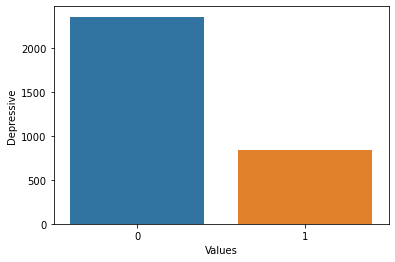

In [10]:
ax = sns.barplot(x = data["Depressive"].unique(),y = data["Depressive"].value_counts());
ax.set(xlabel="Values");

In [11]:
data.head(10)

,Tweet,Depressive
0,Today in Selfcare: beauty &amp; laughs Kung Fu Panda 3 #Wellness #joy #laughter #selfcare #therapist #philadelphia,0
1,I get to spend New Year's home again alone and lonely. ???•,1
2,"Depressed and lonely /: Stuck in a deep, never ending hole :(",1
3,"If this is your response to someone saying they're dealing with , you're a terrible person.",0
4,Apparently you get a free pass just by mentioning Where was I on the free badge day??!!,0
5,When you will never again give birth to violent men.. pic.twitter.com/pkdPhhlUuZ,0
6,Learning to pretend to have a good time had become a natural skill. I hope one day it is genuine,1
7,Aw man im outta pizza rolls,0
8,When you go out and try to be a part of life & end up feeling like you are less a part of it then when you started. pic.twitter.com/J625NXrWDb,0
9,So far he stop texting me…after I said something…so hopefully he doesn't show up at my house…,1


In [12]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
data["Processed_Tweet"] = data["Tweet"].str.replace(userPattern, "")
data["Processed_Tweet"] = data["Processed_Tweet"].str.replace(urlPattern, "")
data["Processed_Tweet"] = data["Processed_Tweet"].str.replace(r"pic.twitter.com\S+", "")
data.head(10)

,Tweet,Depressive,Processed_Tweet
0,Today in Selfcare: beauty &amp; laughs Kung Fu Panda 3 #Wellness #joy #laughter #selfcare #therapist #philadelphia,0,Today in Selfcare: beauty &amp; laughs Kung Fu Panda 3 #Wellness #joy #laughter #selfcare #therapist #philadelphia
1,I get to spend New Year's home again alone and lonely. ???•,1,I get to spend New Year's home again alone and lonely. ???•
2,"Depressed and lonely /: Stuck in a deep, never ending hole :(",1,"Depressed and lonely /: Stuck in a deep, never ending hole :("
3,"If this is your response to someone saying they're dealing with , you're a terrible person.",0,"If this is your response to someone saying they're dealing with , you're a terrible person."
4,Apparently you get a free pass just by mentioning Where was I on the free badge day??!!,0,Apparently you get a free pass just by mentioning Where was I on the free badge day??!!
5,When you will never again give birth to violent men.. pic.twitter.com/pkdPhhlUuZ,0,When you will never again give birth to violent men..
6,Learning to pretend to have a good time had become a natural skill. I hope one day it is genuine,1,Learning to pretend to have a good time had become a natural skill. I hope one day it is genuine
7,Aw man im outta pizza rolls,0,Aw man im outta pizza rolls
8,When you go out and try to be a part of life & end up feeling like you are less a part of it then when you started. pic.twitter.com/J625NXrWDb,0,When you go out and try to be a part of life & end up feeling like you are less a part of it then when you started.
9,So far he stop texting me…after I said something…so hopefully he doesn't show up at my house…,1,So far he stop texting me…after I said something…so hopefully he doesn't show up at my house…


In [13]:
data["Processed_Tweet"] = data["Processed_Tweet"].str.replace("[^a-zA-Z]", " ")
data.head(10)

,Tweet,Depressive,Processed_Tweet
0,Today in Selfcare: beauty &amp; laughs Kung Fu Panda 3 #Wellness #joy #laughter #selfcare #therapist #philadelphia,0,Today in Selfcare beauty amp laughs Kung Fu Panda Wellness joy laughter selfcare therapist philadelphia
1,I get to spend New Year's home again alone and lonely. ???•,1,I get to spend New Year s home again alone and lonely
2,"Depressed and lonely /: Stuck in a deep, never ending hole :(",1,Depressed and lonely Stuck in a deep never ending hole
3,"If this is your response to someone saying they're dealing with , you're a terrible person.",0,If this is your response to someone saying they re dealing with you re a terrible person
4,Apparently you get a free pass just by mentioning Where was I on the free badge day??!!,0,Apparently you get a free pass just by mentioning Where was I on the free badge day
5,When you will never again give birth to violent men.. pic.twitter.com/pkdPhhlUuZ,0,When you will never again give birth to violent men
6,Learning to pretend to have a good time had become a natural skill. I hope one day it is genuine,1,Learning to pretend to have a good time had become a natural skill I hope one day it is genuine
7,Aw man im outta pizza rolls,0,Aw man im outta pizza rolls
8,When you go out and try to be a part of life & end up feeling like you are less a part of it then when you started. pic.twitter.com/J625NXrWDb,0,When you go out and try to be a part of life end up feeling like you are less a part of it then when you started
9,So far he stop texting me…after I said something…so hopefully he doesn't show up at my house…,1,So far he stop texting me after I said something so hopefully he doesn t show up at my house


In [14]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [15]:
data.drop(["Tweet"], axis = 1, inplace = True)

In [16]:
data.head()

,Depressive,Processed_Tweet
0,0,Today in Selfcare beauty amp laughs Kung Fu Panda Wellness joy laughter selfcare therapist philadelphia
1,1,I get to spend New Year s home again alone and lonely
2,1,Depressed and lonely Stuck in a deep never ending hole
3,0,If this is your response to someone saying they re dealing with you re a terrible person
4,0,Apparently you get a free pass just by mentioning Where was I on the free badge day


In [17]:
def remove_stopwords(text):
    clean_text = " ".join([word for word in text.split() if word not in stopwords])
    return clean_text


data["Processed_Tweet"] = data["Processed_Tweet"].apply(lambda text: remove_stopwords(text.lower()))
data.head()

,Depressive,Processed_Tweet
0,0,today selfcare beauty amp laughs kung fu panda wellness joy laughter selfcare therapist philadelphia
1,1,get spend new year home alone lonely
2,1,depressed lonely stuck deep never ending hole
3,0,response someone saying dealing terrible person
4,0,apparently get free pass mentioning free badge day


In [18]:
data["Processed_Tweet"] = data["Processed_Tweet"].apply(lambda x: x.split())
data.head()

,Depressive,Processed_Tweet
0,0,"[today, selfcare, beauty, amp, laughs, kung, fu, panda, wellness, joy, laughter, selfcare, therapist, philadelphia]"
1,1,"[get, spend, new, year, home, alone, lonely]"
2,1,"[depressed, lonely, stuck, deep, never, ending, hole]"
3,0,"[response, someone, saying, dealing, terrible, person]"
4,0,"[apparently, get, free, pass, mentioning, free, badge, day]"


In [19]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
data["Processed_Tweet"] = data["Processed_Tweet"].apply(lambda x: [stemmer.stem(i) for i in x])
data.head()

,Depressive,Processed_Tweet
0,0,"[today, selfcar, beauti, amp, laugh, kung, fu, panda, well, joy, laughter, selfcar, therapist, philadelphia]"
1,1,"[get, spend, new, year, home, alon, lone]"
2,1,"[depress, lone, stuck, deep, never, end, hole]"
3,0,"[respons, someon, say, deal, terribl, person]"
4,0,"[appar, get, free, pass, mention, free, badg, day]"


In [20]:
data["Processed_Tweet"] = data["Processed_Tweet"].apply(lambda x: ' '.join([w for w in x]))
data.head()

,Depressive,Processed_Tweet
0,0,today selfcar beauti amp laugh kung fu panda well joy laughter selfcar therapist philadelphia
1,1,get spend new year home alon lone
2,1,depress lone stuck deep never end hole
3,0,respons someon say deal terribl person
4,0,appar get free pass mention free badg day


In [21]:
data["Processed_Tweet"] = data["Processed_Tweet"].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
data.head()

,Depressive,Processed_Tweet
0,0,today selfcar beauti laugh kung panda well laughter selfcar therapist philadelphia
1,1,spend year home alon lone
2,1,depress lone stuck deep never hole
3,0,respons someon deal terribl person
4,0,appar free pass mention free badg


In [32]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [33]:
count_vectorizer = CountVectorizer(stop_words='english')
cv = count_vectorizer.fit_transform(data["Processed_Tweet"])
cv.shape

(3200, 4496)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(cv, data["Depressive"], test_size=.2, stratify=data["Depressive"], random_state=42)

In [35]:
X_train.shape

(2560, 4496)

In [51]:
X_test.shape

(640, 4496)

In [37]:
y_train.shape

(2560,)

In [38]:
y_test.shape

(640,)

In [39]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
prediction_nb = nb.predict(X_test)

print(accuracy_score(prediction_nb, y_test))
print(precision_score(y_test, prediction_nb, labels=[0], average='micro'))
print(recall_score(y_test, prediction_nb, labels=[0], average='micro'))
print(f1_score(y_test, prediction_nb, labels=[0], average='micro'))

0.734375
0.8181818181818182
0.821656050955414
0.8199152542372881


In [40]:
xgbc = XGBClassifier(max_depth=6, n_estimators=1000, nthread=3)
xgbc.fit(X_train, y_train)
prediction_xgb = xgbc.predict(X_test)

print(accuracy_score(prediction_xgb, y_test))
print(precision_score(y_test, prediction_xgb, labels=[0], average='micro'))
print(recall_score(y_test, prediction_xgb, labels=[0], average='micro'))
print(f1_score(y_test, prediction_xgb, labels=[0], average='micro'))

[11:35:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.753125
0.820040899795501
0.851380042462845
0.8354166666666667
